In [1]:
if (!require("ISLR2")) install.packages("ISLR2")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("dplyr")) install.packages("dplyr")
if (!require("MASS")) install.packages("MASS")
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)
if (!require("scales")) install.packages("scales")
if (!require("arules")) install.packages("arules")
if (!require("gridExtra")) install.packages("gridExtra")

if (!require("BiocManager")) install.packages("BiocManager")
BiocManager::install(c("gRbase", "gRain", "gRim"), force=TRUE)

Loading required package: ISLR2

Loading required package: tidyverse

-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


The following object is masked from 'package:ISLR2':

    Boston


Loading required package: scales


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard



  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.4.2  1.4.3              TRUE

  Binaries will be installed
package 'BiocGenerics' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'graph' successfully unpacked and MD5 sums checked
package 'RBGL' successfully unpacked and MD5 sums checked
package 'Rgraphviz' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'BiocVersion' successfully unpacked and MD5 sums checked
package 'gRbase' successfully unpacked and MD5 sums checked
package 'gRain' successfully unpacked and MD5 sums checked
package 'gRim' successfully unpacked and MD5 sums checked

The downloaded binary packa

Old packages: 'cachem', 'fs', 'igraph', 'MASS', 'Matrix', 'sass', 'sys',
  'tzdb', 'vroom', 'xml2'



Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'ggplot' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"package 'tidyverse' is in use and will not be installed"


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


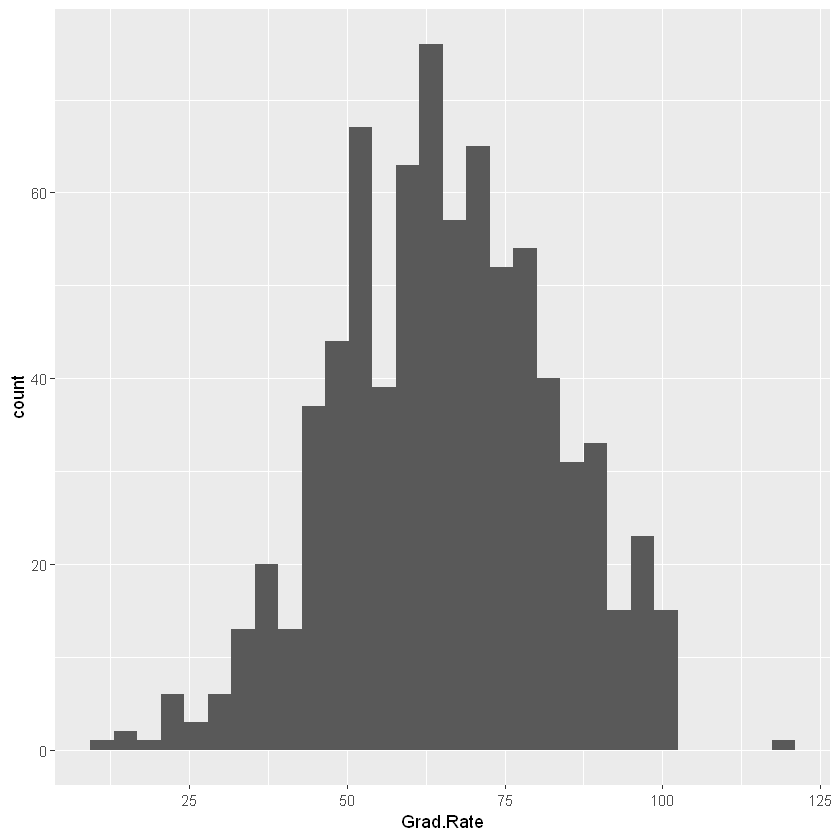

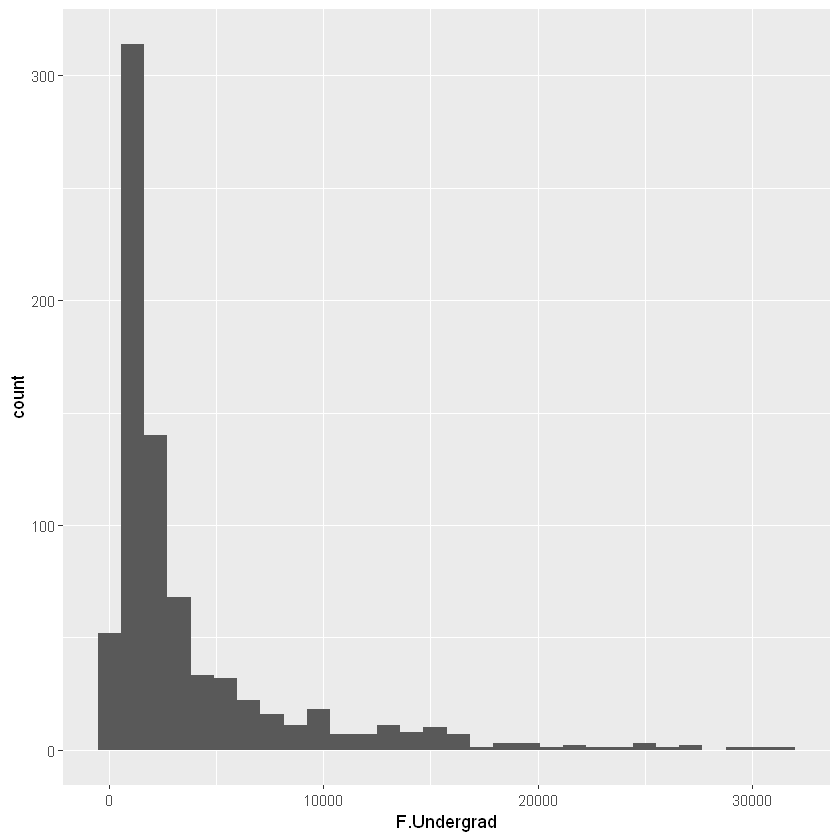

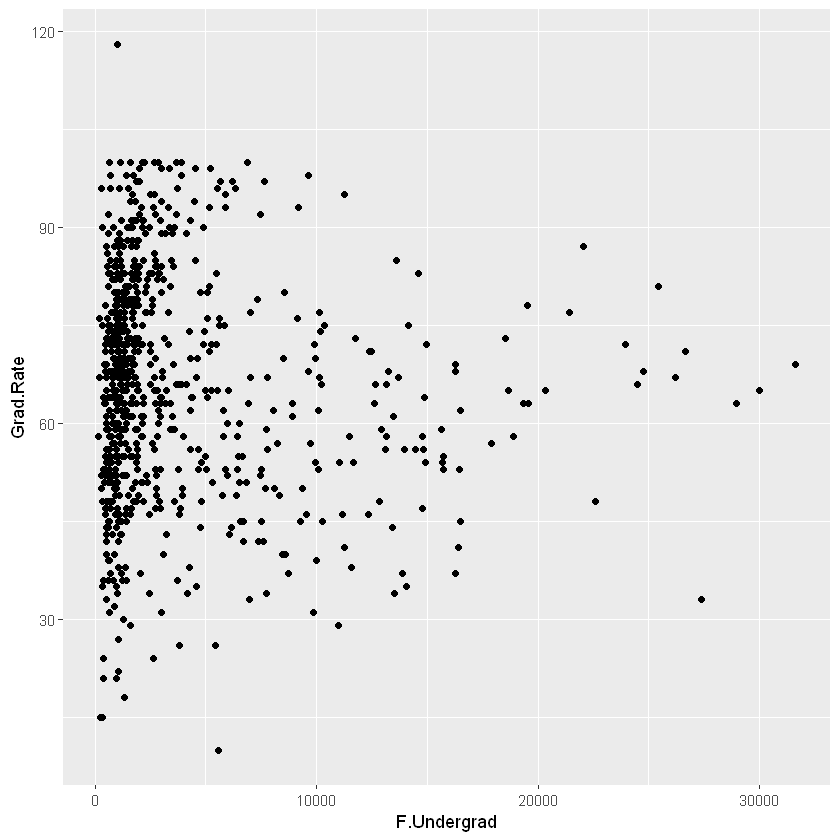

In [4]:
#Question 1

#Installation of all necessary libraries/packages per instructions
if (!require("ISLR2")) install.packages("ISLR2")
library(ISLR2)
install.packages("ggplot2")
install.packages("ggplot")
install.packages("tidyverse")
data(College)
head(College)


#1a 

#Data visualization and transformation in histogram form
ggplot(College, aes(x = Grad.Rate)) + geom_histogram()
ggplot(College, aes(x = F.Undergrad)) + geom_histogram()
ggplot(College, aes(x = F.Undergrad,
                    y = Grad.Rate))+ geom_point()

In [5]:
#1a  I argue that a transformation is required due to the resulting distribution seen in the visualizations (i.e., 'F.Undergrad' is negatively skewed), and this is indicative of a need for data transformation. Scaling is completed below as well.

Warning message:
"package 'ggplot2' is in use and will not be installed"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


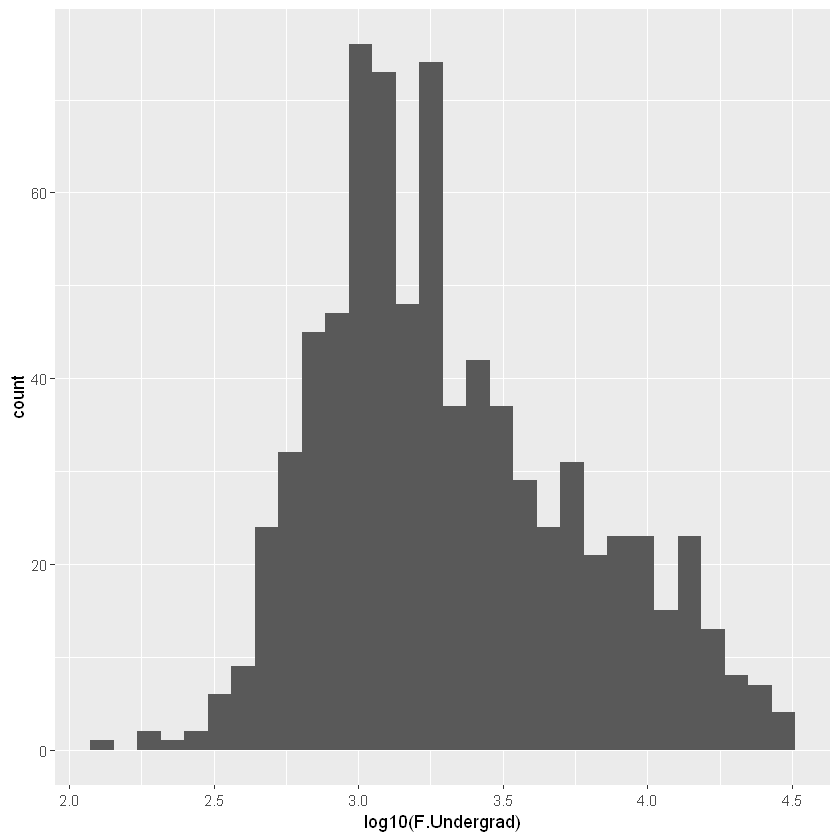

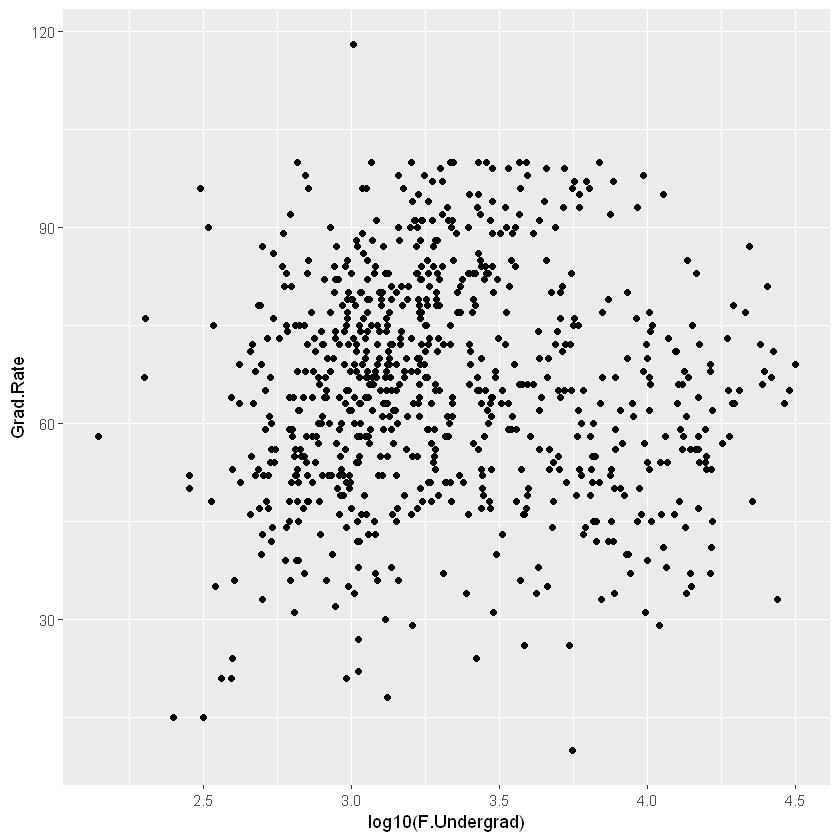

In [7]:
#1b

#Rescaling the F.Undergrad and Grad.Rate graph
install.packages("ggplot2")
ggplot(College, aes(x = log10(F.Undergrad))) + geom_histogram()
ggplot(College, aes(x=log10(F.Undergrad),
                    y=Grad.Rate))+ geom_point()

In [8]:
#1b The scaling results indicate that there is a relationship between the total number of full-time undergraduates and the rate of graduation. A regression analysis can be implemented with this transformed data.

In [9]:
#1c

#Subsetting the data into two dataframes ('public' and 'private')
public <- College[College$Private == "No", ]
private <- College[College$Private == "Yes", ]

#Eliminating the column 'private', which is no longer needed after creating two separate dataframes
public$Private <- NULL
private$Private <- NULL

#Sorting both dataframes alphabetically 
public <- public[order(rownames(public)), ]
private <- private[order(rownames(private)), ]

#Saving each dataframe as tab delimited .txt files
write.table(private, "private.txt", sep = "\t")
write.table(public, "public.txt", sep = "\t")

In [10]:
#1d

#Calculating the median value of "Top25perc" both for the public and private dataframes
median_public <- median(public$Top25perc, na.rm = TRUE)
median_private <- median(private$Top25perc, na.rm = TRUE)

#Subsetting both dataframes to exclude universities with values less than the "Top25perc" median value
public <- subset(public, Top25perc >= median_public)
private <- subset(private, Top25perc >= median_private)

In [11]:
#1e

#Loading the dplyr library (to be able to use the mutate function)
install.packages("dplyr")

#Dividing data based on thresholds  of 0, 1/3 and 2/3 to calculate quanitles (per prior histogram)
quantiles_public <- quantile(public$Grad.Rate, probs = c(0, 0.33, 0.67, 1))
quantiles_private <- quantile(private$Grad.Rate, probs = c(0, 0.33, 0.67, 1))

#Creating the new variable  
public <- public %>%
  mutate(grad_category = case_when(
    Grad.Rate >= quantiles_public[2] & Grad.Rate  < quantiles_public[3] ~ "Medium",
    Grad.Rate  >= quantiles_public[3] ~ "High",
    TRUE ~ "Low"
))
private <- private %>%
  mutate(grad_category = case_when(
    Grad.Rate  >= quantiles_private[2] & Grad.Rate  < quantiles_private[3] ~ "Medium",
    Grad.Rate  >= quantiles_private[3] ~ "High",
    TRUE ~ "Low"
))
head(private)

Warning message:
"package 'dplyr' is in use and will not be installed"


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,grad_category
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Low
Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,Low
Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,Medium
Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,Medium
Alfred University,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73,Medium
Allegheny College,2652,1900,484,44,77,1707,44,17080,4440,400,600,73,91,9.9,41,11711,76,Medium


In [12]:
#1f

#Creating a list structure of the 'public' and 'private' dataframes
public_private <- list(public = public, private = private)

#Saving the output to an .RData file
save(public_private, file = "assignment_data.RData")

In [21]:
#Question 2

#Installation of all necessary libraries/packages per instructions
install.packages("dplyr")
load("marketing.rdata")

#Constructing a table from text book data 
demographic = c("Sex", "Martial_Status", "Age", "Education", "Occupation", "Income", "Years_In_BayArea", "Dual_Incomes", "Numbers_in_Household", 
                "Number_of_Children", "Householder_Status", "Type_of_Home", "Ethinic_Classification", "Language_in_Home")
N = 9409
Sex = sample(c(1,2), N,replace = T)
Martial_Status = sample(seq(1,5), N, replace = T)
Age = sample(seq(1,7), N, replace = T)
Education = sample(seq(1,6), N, replace = T)
Occupation = sample(seq(1,9), N, replace = T)
Income = sample(seq(1,9), N, replace = T)
Years_In_BayArea = sample(seq(1,5), N, replace = T)
Dual_Incomes = sample(seq(1,3), N, replace = T)

Numbers_in_Household = sample(seq(1,9), N, replace = T)
Number_of_Children = sample(seq(1,9), N, replace = T)
Householder_Status = sample(seq(1,3), N, replace = T)
Type_of_Home = sample(seq(1,5), N, replace = T)
Ethinic_Classification = sample(seq(1,8), N, replace = T) 
Language_in_Home = sample(seq(1,3), N, replace = T)

#Constructing the training sample dataframe
training_sample = data.frame(Sex, Martial_Status, Age, Education, Occupation, Income, Years_In_BayArea, Dual_Incomes, Numbers_in_Household, 
                             Number_of_Children, Householder_Status, Type_of_Home, Ethinic_Classification, Language_in_Home)

#Assigning all demographic variable names to the columns of the dataframe
names(training_sample) = demographic

#Adding a target column, with all values set to 1
training_sample$target = 1

#Removing the individual variable columns from the environment
rm(Sex, Martial_Status, Age, Education, Occupation, Income, Years_In_BayArea, Dual_Incomes, Number_of_Children, Numbers_in_Household, 
   Householder_Status, Type_of_Home, Ethinic_Classification, Language_in_Home)

#Creating a reference sample by assigning the training sample to it
ref_sample = training_sample

#Iterating over each column of the 'ref_sample' dataframe and replacing the column values with a randomly shuffled version of the same column values
for(i in 1:ncol(ref_sample)){
  ref_sample[,i] = sample(ref_sample[,i], nrow(ref_sample), replace = F)
}

#Setting the target column of the 'ref_sample' dataframe to 0 (class 0)
ref_sample$target = 0

#Combining the 'ref_sample' dataframe with the 'training_sample' and 
#Removing the 'ref_sample' and 'training_sample' dataframes from the environment using the rm() function
acombined_data = rbind(ref_sample, training_sample); rm(ref_sample, training_sample)

#Changing columns that contain categorical data  
acombined_data$Sex = as.factor(as.character(acombined_data$Sex))
acombined_data$Martial_Status = as.factor(as.character(acombined_data$Martial_Status))
acombined_data$Occupation = as.factor(as.character(acombined_data$Occupation))
acombined_data$Dual_Incomes = as.factor(as.character(acombined_data$Dual_Incomes))
acombined_data$Householder_Status = as.factor(as.character(acombined_data$Householder_Status))
acombined_data$Type_of_Home = as.factor(as.character(acombined_data$Type_of_Home))
acombined_data$Ethinic_Classification = as.factor(as.character(acombined_data$Ethinic_Classification))
acombined_data$Language_in_Home = as.factor(as.character(acombined_data$Language_in_Home))

#Decision tree
#Installation of all necessary libraries/packages
install.packages("rpart")
library(rpart)

#Converting the 'target' column in the 'a_combined' dataframe to a factor variable
acombined_data$target = as.factor(as.character(acombined_data$target))

#Creating the decision tree using the rpart() function as well as the target formula, which specifies that the target variable is predicted based on all other variables in the dataframe
model = rpart(target~., acombined_data)

#Displaying a summary of the decision tree model
summary(model)

#Employing the predict() function to make predictions using the decsision tree model on the 'acombined_data' dataframe
predicted = predict(model, acombined_data[,-c(15)])
head(predicted, 10)

Warning message:
"package 'dplyr' is in use and will not be installed"


package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lisa Kulka\AppData\Local\Temp\RtmpGmjfwb\downloaded_packages
Call:
rpart(formula = target ~ ., data = acombined_data)
  n= 18818 

    CP nsplit rel error xerror xstd
1 0.01      0         1      0    0

Node number 1: 18818 observations
  predicted class=0  expected loss=0.5  P(node) =1
    class counts:  9409  9409
   probabilities: 0.500 0.500 



0,1
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5
0.5,0.5


In [ ]:
#Question 2 Results: Based on the given model, it is evident that the features lack predictive power for classification. This is indicated by the presence of a single root in the model, suggesting that its predictive ability is limited. To further support this observation, predictions made using the model on the training set itself demonstrate that the predicted probabilities for each row are evenly distributed, with a probability of one-half assigned to both classes.  This allows for the conclusion that the model lacks predictive power, as it fails to provide meaningful distinctions between classes.

Warning message:
"package 'MASS' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'scales' is in use and will not be installed"
Warning message:
"package 'arules' is in use and will not be installed"
Warning message:
"package 'gridExtra' is in use and will not be installed"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


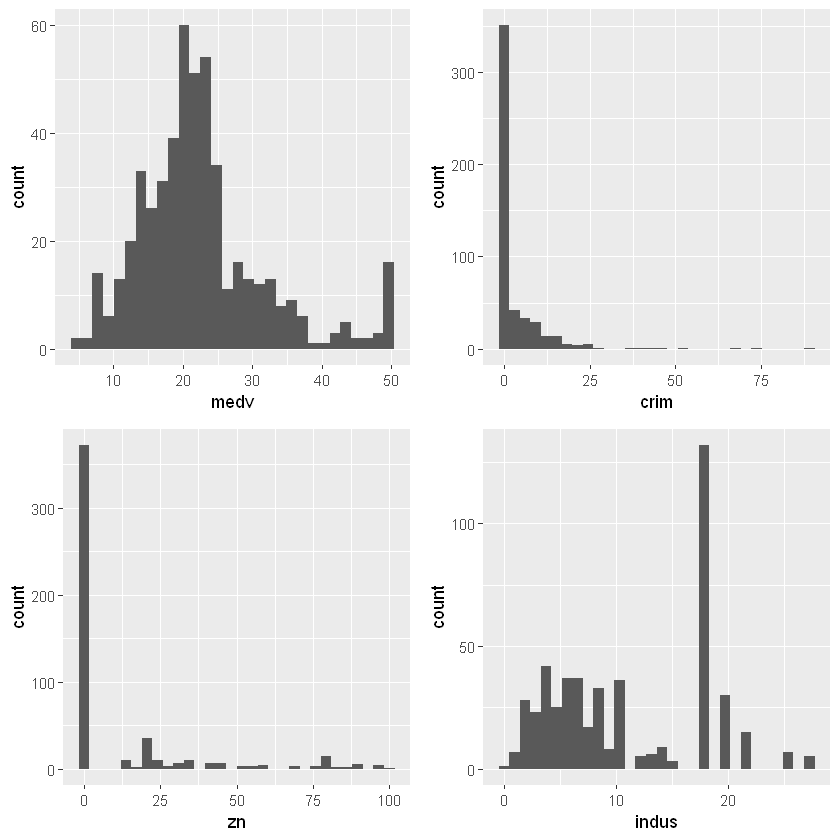

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


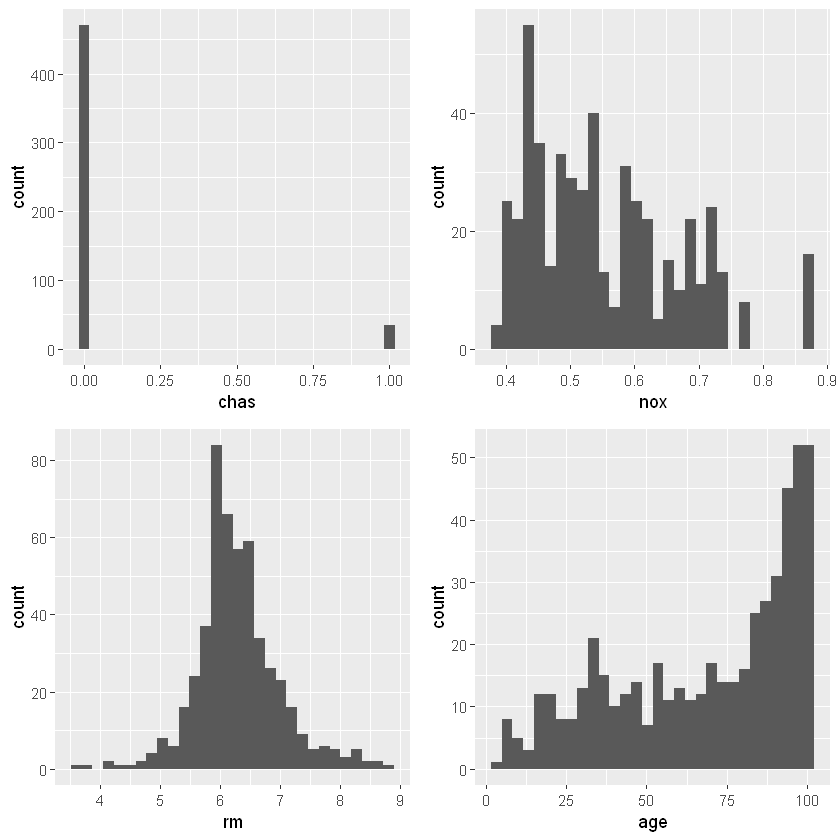

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


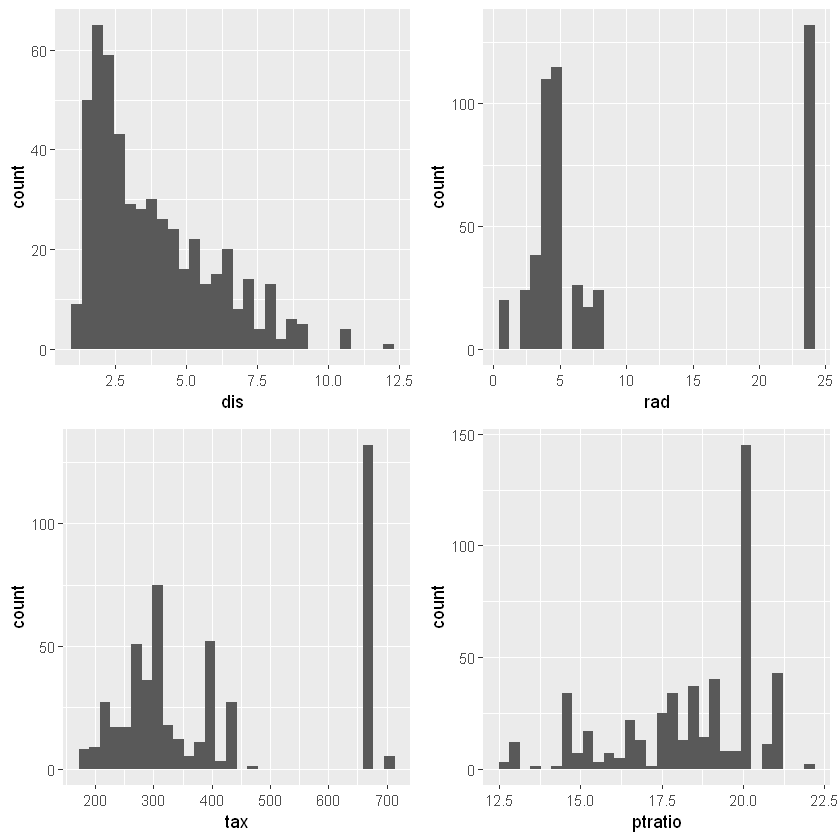

             crim                      zn     
 very-low-crime:294   non-residential   :372  
 low-crime     : 38   small-residence   : 33  
 moderate-crime: 68   moderate-residence: 56  
 high-crime    :106   large-residence   : 45  
                             indus                    rm     
 very-low-business-concentration:120   small-house     : 16  
 low-business-concentration     :150   large-house     :426  
 moderate-business-concentration:209   very-large-house: 64  
 high-business-concentration    : 27                         
                       age             dis                         rad     
 few-old-houses          : 34   very-near:112   easily-accessible    :307  
 old-houses-in-moderation:113   near     :259   moderately-accessible: 67  
 lots-of-old-houses      :359   far      :130   not-accessible       :132  
                                very-far :  5                              
           tax                    ptratio           medv    
 low-tax     :

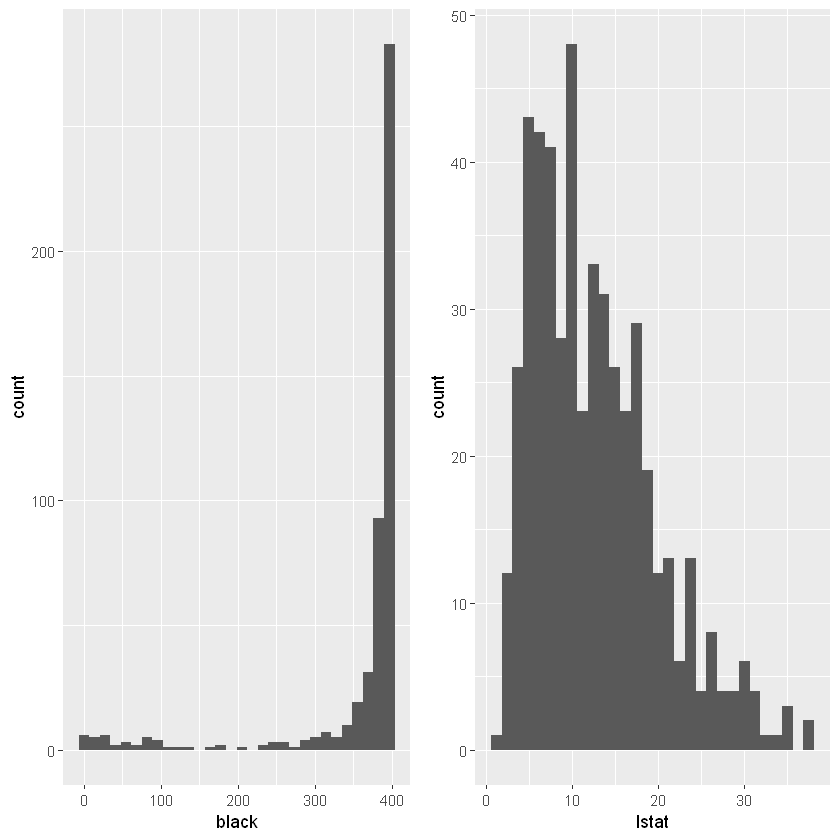

In [16]:
#Question 3

#Installation of all necessary libraries/packages
install.packages("MASS")
install.packages("ggplot2")
install.packages("scales")
install.packages("arules")
install.packages("gridExtra")
data("Boston")

#3a

#Creating multiple histograms with variable sets using ggplot2, as below
#medv, crim, zn and indus
p1 <- ggplot(data = Boston, aes(x = medv)) + geom_histogram()
p2 <- ggplot(data = Boston, aes(x = crim)) + geom_histogram()
p3 <- ggplot(data = Boston, aes(x = zn)) + geom_histogram()
p4 <- ggplot(data = Boston, aes(x = indus)) + geom_histogram()
grid.arrange(p1, p2, p3, p4, ncol=2)

#chas, nos, rm and age
p5 <- ggplot(data = Boston, aes(x = chas)) + geom_histogram()
p6 <- ggplot(data = Boston, aes(x = nox)) + geom_histogram()
p7 <- ggplot(data = Boston, aes(x = rm)) + geom_histogram()
p8 <- ggplot(data = Boston, aes(x = age)) + geom_histogram()
grid.arrange(p5, p6, p7, p8, ncol=2)

#dis, rad, tax and ptratio
p9 <- ggplot(data = Boston, aes(x = dis)) + geom_histogram()
p10 <- ggplot(data = Boston, aes(x = rad)) + geom_histogram()
p11 <- ggplot(data = Boston, aes(x = tax)) + geom_histogram()
p12 <- ggplot(data = Boston, aes(x = ptratio)) + geom_histogram()
grid.arrange(p9, p10, p11, p12, ncol=2)

#black and lstat
p13 <- ggplot(data = Boston, aes(x = black)) + geom_histogram()
p14 <- ggplot(data = Boston, aes(x = lstat)) + geom_histogram()
grid.arrange(p13, p14, ncol=2)

#Transforming the data into a binary incidence matrix
Boston[["crim"]] <- ordered(cut(Boston[["crim"]], c(0,0.5,1,5,100)), labels = c('very-low-crime','low-crime','moderate-crime','high-crime'))
Boston[["zn"]] <- ordered(cut(Boston[["zn"]], c(-1,10,20,50,100)), labels = c('non-residential','small-residence','moderate-residence','large-residence'))
Boston[["indus"]] <- ordered(cut(Boston[["indus"]], c(0,5,10,20,30)), labels = c('very-low-business-concentration','low-business-concentration','moderate-business-concentration','high-business-concentration'))
Boston[["chas"]] <- NULL
Boston[["nox"]] <- NULL
Boston[["rm"]] <- ordered(cut(Boston[["rm"]], c(1,5,7,10)), labels = c('small-house','large-house','very-large-house'))
Boston[["age"]] <- ordered(cut(Boston[["age"]], c(0,20,50,100)), labels = c('few-old-houses','old-houses-in-moderation','lots-of-old-houses'))
Boston[["dis"]] <- ordered(cut(Boston[["dis"]], c(0,2,5,10,15)), labels = c('very-near','near','far','very-far'))
Boston[["rad"]] <- ordered(cut(Boston[["rad"]], c(0,5,10,25)), labels = c('easily-accessible','moderately-accessible','not-accessible'))
Boston[["tax"]] <- ordered(cut(Boston[["tax"]], c(0,300,500,1000)), labels = c('low-tax','moderate-tax','high-tax'))
Boston[["ptratio"]] <- ordered(cut(Boston[["ptratio"]], c(10,15,20,25)), labels = c('small-class','mediam-sized-class','large-class'))
Boston[["black"]] <- NULL
Boston[["medv"]] <- ordered(cut(Boston[["medv"]], c(1,20,35,60)), labels = c('cheap','moderate','expensive'))
Boston[["lstat"]] <- NULL
summary(Boston)

In [ ]:
#3a Per the creation of histograms, the category groupings have been visualized, and data clusters are clearly apparent within them.

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[34 item(s), 506 transaction(s)] done [0.00s].
sorting and recoding items ... [34 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10 done [0.05s].
writing ... [220203 rule(s)] done [0.12s].
creating S4 object  ... done [0.28s].


set of 220203 rules

rule length distribution (lhs + rhs):sizes
    1     2     3     4     5     6     7     8     9    10 
    4   197  2554 13816 38401 61084 58510 33557 10646  1434 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.000   6.000   6.403   7.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift         
 Min.   :0.001976   Min.   :0.6000   Min.   :0.001976   Min.   :  0.7127  
 1st Qu.:0.001976   1st Qu.:0.9412   1st Qu.:0.001976   1st Qu.:  1.4095  
 Median :0.005929   Median :1.0000   Median :0.007905   Median :  1.9537  
 Mean   :0.016488   Mean   :0.9379   Mean   :0.018795   Mean   :  3.1156  
 3rd Qu.:0.015810   3rd Qu.:1.0000   3rd Qu.:0.017787   3rd Qu.:  3.2113  
 Max.   :0.841897   Max.   :1.0000   Max.   :1.000000   Max.   :101.2000  
     count        
 Min.   :  1.000  
 1st Qu.:  1.000  
 Median :  3.000  
 Mean   :  8.343  
 3rd Qu.:  8.000  
 Max.   :426.000  

mining info:
      data nt

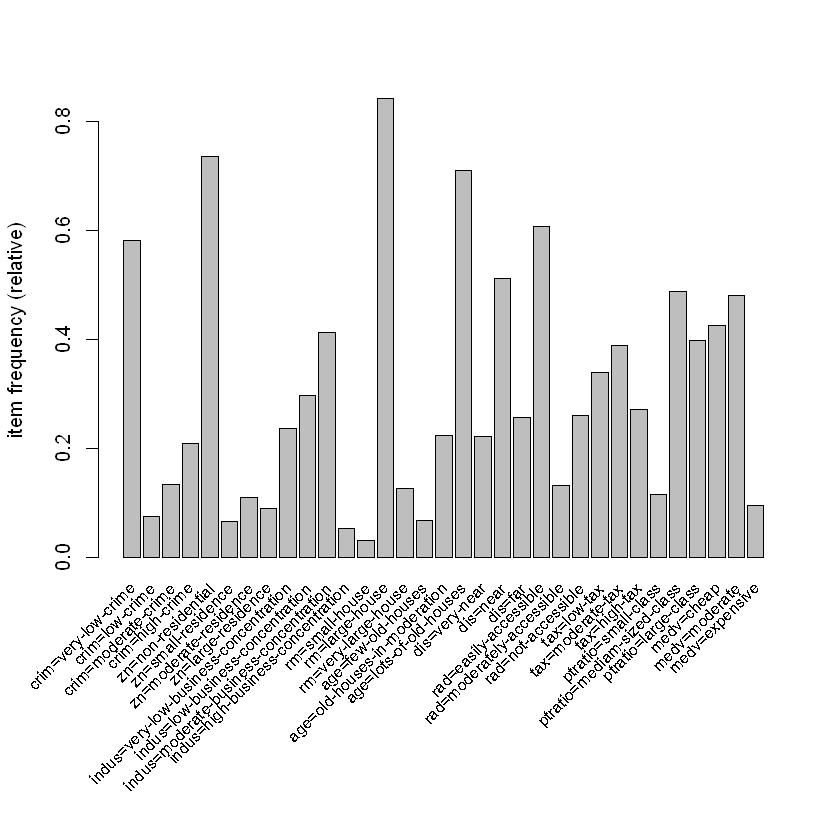

In [17]:
#3b

#Visualizing the data using the itemFrequencyPlot
Boston_tr <- as(Boston,'transactions')
itemFrequencyPlot(Boston_tr,support = 0.03, cex.names = 0.8 )

#Applying the apriori algorithm
rules <- apriori(Boston_tr, parameter = list(support = 0.001, confidence = 0.6))
summary(rules)

In [18]:
#3c

#Extracting rules in which the right-hand side (rhs) is "tax=low-tax" and the lift is greater than 1.2
rules_LowTax <- subset(rules, subset = rhs %in% "tax=low-tax" & lift > 1.2)

#Extracting rules in which the right-hand side (rhs) is "crim=very-low-crime" and the lift is greater than 1.2
rules_LowCrime <- subset(rules, subset = rhs %in% "crim=very-low-crime" & lift > 1.2)

#Printing a summary of 'rules_LowTax'
summary(rules_LowTax)

#Printing a summary of 'rules_LowCrime'
summary(rules_LowCrime)

#Inspecting the first few rules from 'rules_LowCrime,' sorted in ascending order
inspect(head(sort(rules_LowCrime)))

#Extracting rules in which the right-hand side (rhs) is "crim=low-crime", the left-hand side (lhs) is "tax=low-tax", and the lift is greater than 1.2
rulesLowCrimeLowTax <- subset(rules, subset = rhs %in% "crim=low-crime" & lhs %in% "tax=low-tax" & lift > 1.2)

#Printing a summary of 'rulesLowCrimeLowTax'
summary(rulesLowCrimeLowTax)

#Inspecting the top 6 rules from 'rulesLowCrimeLowTax,' which is sorted by lift in descending order
inspect(head(sort(rulesLowCrimeLowTax, by = 'lift'), n = 6))

set of 8853 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6    7    8    9   10 
   2   69  469 1439 2449 2448 1443  469   65 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   6.000   6.000   6.498   7.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.001976   Min.   :0.6000   Min.   :0.001976   Min.   :1.765  
 1st Qu.:0.001976   1st Qu.:0.8750   1st Qu.:0.001976   1st Qu.:2.574  
 Median :0.005929   Median :1.0000   Median :0.005929   Median :2.942  
 Mean   :0.012016   Mean   :0.9237   Mean   :0.014980   Mean   :2.717  
 3rd Qu.:0.011858   3rd Qu.:1.0000   3rd Qu.:0.013834   3rd Qu.:2.942  
 Max.   :0.278656   Max.   :1.0000   Max.   :0.462451   Max.   :2.942  
     count       
 Min.   :  1.00  
 1st Qu.:  1.00  
 Median :  3.00  
 Mean   :  6.08  
 3rd Qu.:  6.00  
 Max.   :141.00  

mining info:
      data ntransactions support confidence
 Boston_tr           506   0.

set of 18187 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6    7    8    9   10 
  14  186 1059 3058 5041 4942 2863  904  120 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   6.000   6.000   6.444   7.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.001976   Min.   :0.6981   Min.   :0.001976   Min.   :1.202  
 1st Qu.:0.001976   1st Qu.:1.0000   1st Qu.:0.001976   1st Qu.:1.721  
 Median :0.005929   Median :1.0000   Median :0.005929   Median :1.721  
 Mean   :0.013560   Mean   :0.9881   Mean   :0.014125   Mean   :1.701  
 3rd Qu.:0.013834   3rd Qu.:1.0000   3rd Qu.:0.013834   3rd Qu.:1.721  
 Max.   :0.470356   Max.   :1.0000   Max.   :0.606719   Max.   :1.721  
     count        
 Min.   :  1.000  
 1st Qu.:  1.000  
 Median :  3.000  
 Mean   :  6.862  
 3rd Qu.:  7.000  
 Max.   :238.000  

mining info:
      data ntransactions support confidence
 Boston_tr           

    lhs                             rhs                     support confidence  coverage     lift count
[1] {ptratio=mediam-sized-class} => {crim=very-low-crime} 0.4703557  0.9635628 0.4881423 1.658377   238
[2] {rad=easily-accessible}      => {crim=very-low-crime} 0.4624506  0.7622150 0.6067194 1.311839   234
[3] {rm=large-house,                                                                                   
     ptratio=mediam-sized-class} => {crim=very-low-crime} 0.4090909  0.9764151 0.4189723 1.680497   207
[4] {rm=large-house,                                                                                   
     rad=easily-accessible}      => {crim=very-low-crime} 0.3972332  0.7821012 0.5079051 1.346065   201
[5] {medv=moderate}              => {crim=very-low-crime} 0.3794466  0.7901235 0.4802372 1.359872   192
[6] {rad=easily-accessible,                                                                            
     ptratio=mediam-sized-class} => {crim=very-low-crime} 0.3517

set of 526 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6   7   8   9  10 
  1  15  66 140 161 103  35   5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   7.000   6.747   8.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001976   Min.   :0.6000   Min.   :0.001976   Min.   : 7.989  
 1st Qu.:0.003953   1st Qu.:0.8333   1st Qu.:0.004447   1st Qu.:11.096  
 Median :0.005929   Median :1.0000   Median :0.005929   Median :13.316  
 Mean   :0.008228   Mean   :0.9201   Mean   :0.009656   Mean   :12.251  
 3rd Qu.:0.009881   3rd Qu.:1.0000   3rd Qu.:0.013834   3rd Qu.:13.316  
 Max.   :0.023715   Max.   :1.0000   Max.   :0.039526   Max.   :13.316  
     count       
 Min.   : 1.000  
 1st Qu.: 2.000  
 Median : 3.000  
 Mean   : 4.163  
 3rd Qu.: 5.000  
 Max.   :12.000  

mining info:
      data ntransactions support confidence
 Boston_tr           506   0.001        0.6
     

    lhs                                         rhs                  support confidence    coverage     lift count
[1] {zn=small-residence,                                                                                          
     dis=very-near,                                                                                               
     tax=low-tax}                            => {crim=low-crime} 0.007905138          1 0.007905138 13.31579     4
[2] {dis=very-near,                                                                                               
     tax=low-tax,                                                                                                 
     medv=expensive}                         => {crim=low-crime} 0.005928854          1 0.005928854 13.31579     3
[3] {dis=very-near,                                                                                               
     tax=low-tax,                                                               

In [ ]:
#3c Based on the output, the student should move to number 1, as it is in close proximity, has low taxes and is a small-sized residence.

In [19]:
#3d

#Subsetting the 'rules' dataframe to select the rules with a right-hand side (rhs) of "ptratio=small-class" and a lift greater than 1.2
rulesLowPupil_TeacherRatio <- subset(rules, subset = rhs %in% "ptratio=small-class" & lift > 1.2)

#Calculating the summary statistics of the subsetted rules
summary(rulesLowPupil_TeacherRatio)

#Inspecting the head (first few) of the subsetted rules, sorted by lift in descending order
inspect(head(sort(rulesLowPupil_TeacherRatio, by = 'lift'), n = 6))

set of 3340 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6   7   8   9  10 
 26 190 590 959 903 501 152  19 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   6.000   6.000   6.416   7.000  10.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.001976   Min.   :0.6000   Min.   :0.001976   Min.   :5.234  
 1st Qu.:0.003953   1st Qu.:1.0000   1st Qu.:0.003953   1st Qu.:8.724  
 Median :0.005929   Median :1.0000   Median :0.005929   Median :8.724  
 Mean   :0.009602   Mean   :0.9387   Mean   :0.010931   Mean   :8.189  
 3rd Qu.:0.009881   3rd Qu.:1.0000   3rd Qu.:0.013834   3rd Qu.:8.724  
 Max.   :0.059289   Max.   :1.0000   Max.   :0.098814   Max.   :8.724  
     count       
 Min.   : 1.000  
 1st Qu.: 2.000  
 Median : 3.000  
 Mean   : 4.858  
 3rd Qu.: 5.000  
 Max.   :30.000  

mining info:
      data ntransactions support confidence
 Boston_tr           506   0.001        0.6
           

    lhs                                         rhs                       support confidence    coverage     lift count
[1] {crim=low-crime,                                                                                                   
     zn=small-residence}                     => {ptratio=small-class} 0.023715415          1 0.023715415 8.724138    12
[2] {zn=small-residence,                                                                                               
     dis=very-near}                          => {ptratio=small-class} 0.007905138          1 0.007905138 8.724138     4
[3] {crim=low-crime,                                                                                                   
     indus=very-low-business-concentration}  => {ptratio=small-class} 0.023715415          1 0.023715415 8.724138    12
[4] {crim=low-crime,                                                                                                   
     tax=low-tax}                       

In [ ]:
#3d Number 1 is a small residence, with low crime and a low student-to-teacher ratio, which is ideal for this family in accordance with the information provided.